In [1038]:
# Импорт необходимых библиотек и модулей
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN, KMeans
import seaborn as sns

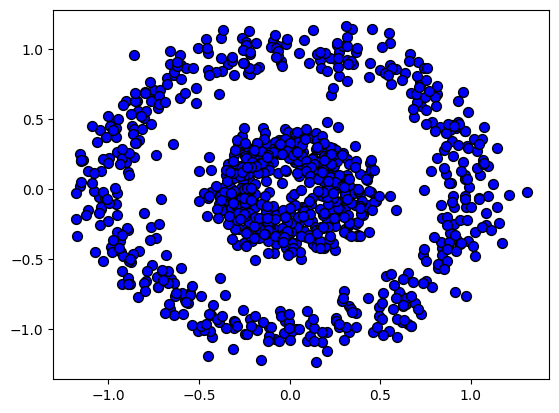

In [938]:
# 1. Изучение данных
# Загрузка набора данных
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)
# Визуализация данных
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='black', s=50)
plt.show()

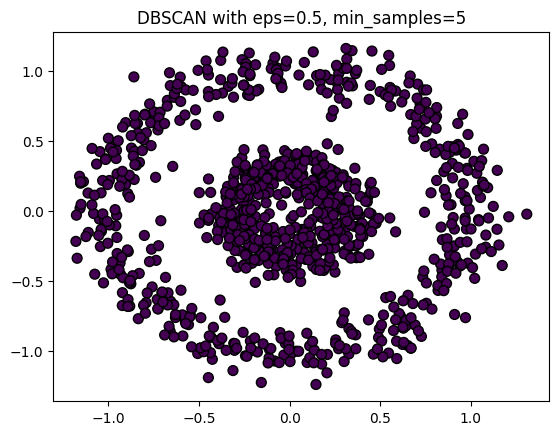

In [939]:
# 2. Кластеризация с DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="viridis", marker='o', edgecolor='black', s=50)
plt.title('DBSCAN with eps=0.5, min_samples=5')
plt.show()

## Анализ eps

**Чем меньше значение eps, а значит меньше окрестность вокруг точек, тем больше появляется выбросов. Увеличение eps приводит к уменьшению количества кластеров. Большое значение eps, а значит большие окрестности точек, приводит к тому что все точки попадают в один кластер.**

________________________

Если значение min_samles = 5, то для того чтобы получилось больше одного кластера, надо eps принять значения меньше 0.2. При уменьшении eps, количество выбросов возрастает. Когда значение eps достигает 0,01 все точки становятся outlier.

In [940]:
def display_clusters(model,eps,min_samples):
   
   plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="viridis", marker='o', edgecolor='black', s=50)
   plt.title(f'DBSCAN with eps={eps}, min_samples={min_samples}')
   print(f'Кластерные метки: {np.unique(dbscan.labels_)}')
   print(f'Количество выбросов: {np.sum(dbscan.labels_==-1)}') 
   plt.show()

Кластерные метки: [0]
Количество выбросов: 0


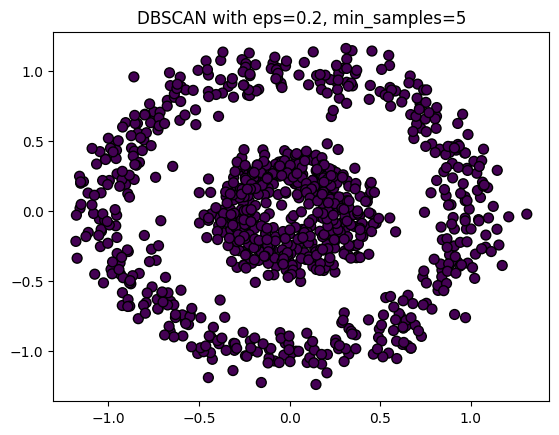

In [941]:
eps=0.2
min_samples=5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X)
display_clusters(clusters,eps,min_samples)

Кластерные метки: [-1  0  1]
Количество выбросов: 2


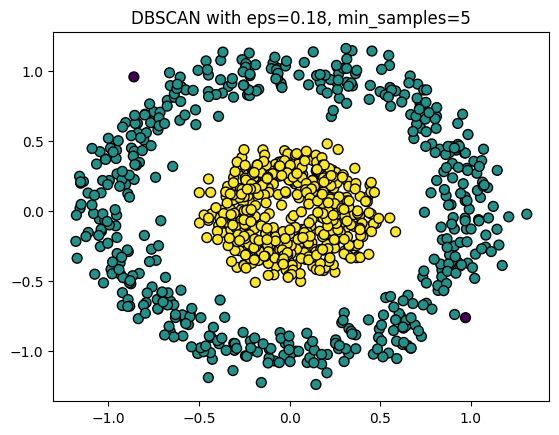

In [942]:

eps=0.18
min_samples=5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X)
display_clusters(clusters,eps,min_samples)

Кластерные метки: [-1  0  1  2  3  4]
Количество выбросов: 37


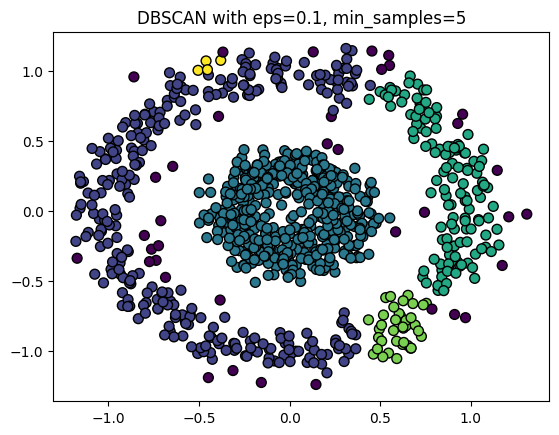

In [943]:

eps=0.1
min_samples=5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X)
display_clusters(clusters,eps,min_samples)

Кластерные метки: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26]
Количество выбросов: 435


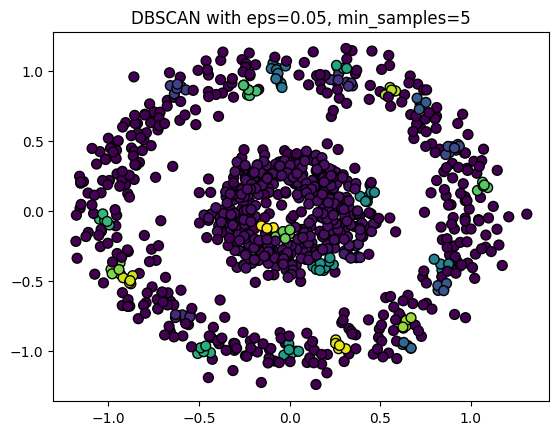

In [944]:

eps=0.05
min_samples=5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X)
display_clusters(clusters,eps,min_samples)

Кластерные метки: [-1]
Количество выбросов: 1000


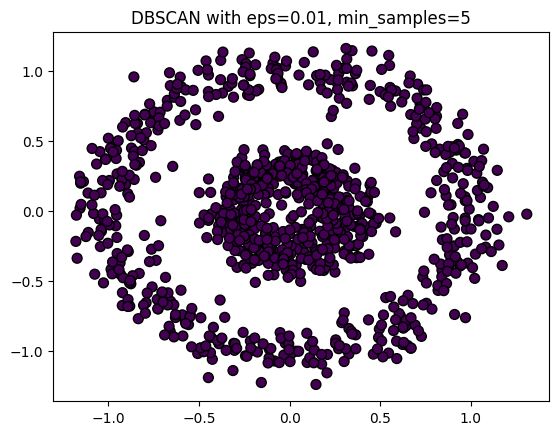

In [945]:

eps=0.01
min_samples=5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X)
display_clusters(clusters,eps,min_samples)


_________________

## Анализ значений min_samples

Значение min_samples главным образом определяет, будут ли точки, расположенные в менее плотных областях, помечены как выбросы или как кластеры. Если увеличить значение min_samples, все, что могло бы стать кластером с количеством точек, не превышающим min_samples, будет помечено как шум. Поэтому значение min_samples задает минимальный размер кластера. Это хорошо видно на первых двух рисунках при eps=0.1, когда значение min_samples = 4 получаем 4 кластера и 28 выбросов, при значении min_samples =8 получаем 12 кластеров и 78 выбросов. Возьмем eps = 0.18 (лучший результат полученный в предыдущем анализе) и значение min_samples = 4, получае количество кластеров 2 и количество выбросов 0, но когда мы увеличиваем min_samples число выбросов тоже увеличивается, при значении min_samples = 98 все точки выбросы. При eps = 0.2 b min_samples = 5 получали один кластер, но увеличивая min_samples=15 добились хороший результат разбиения данных на два кластера и 2 выброса

Кластерные метки: [-1  0  1  2  3]
Количество выбросов: 28


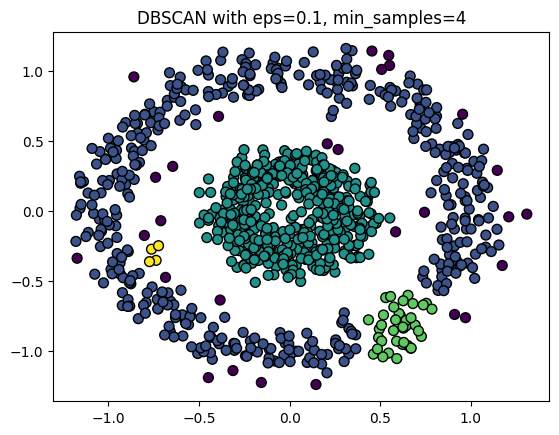

In [967]:

eps=0.1
min_samples=4
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X)
display_clusters(clusters,eps,min_samples)

Кластерные метки: [-1  0  1  2  3  4  5  6  7  8  9 10 11]
Количество выбросов: 78


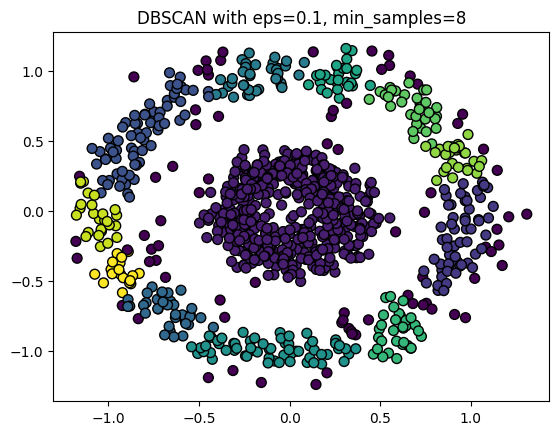

In [965]:
eps=0.1
min_samples=8
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X)
display_clusters(clusters,eps,min_samples)

Кластерные метки: [-1  0  1]
Количество выбросов: 1


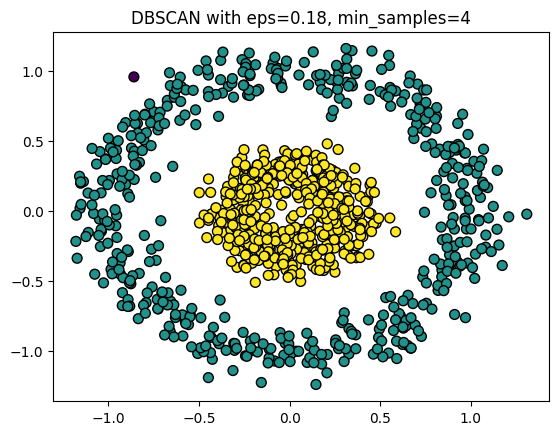

In [996]:
eps=0.18
min_samples=4
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X)
display_clusters(clusters,eps,min_samples)

Кластерные метки: [-1  0  1]
Количество выбросов: 6


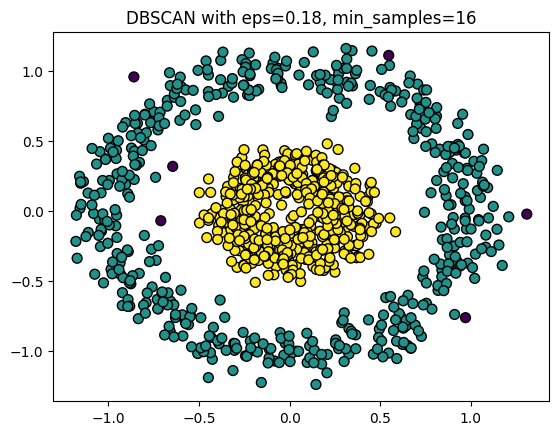

In [986]:
eps=0.18
min_samples=16
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X)
display_clusters(clusters,eps,min_samples)

Кластерные метки: [-1]
Количество выбросов: 1000


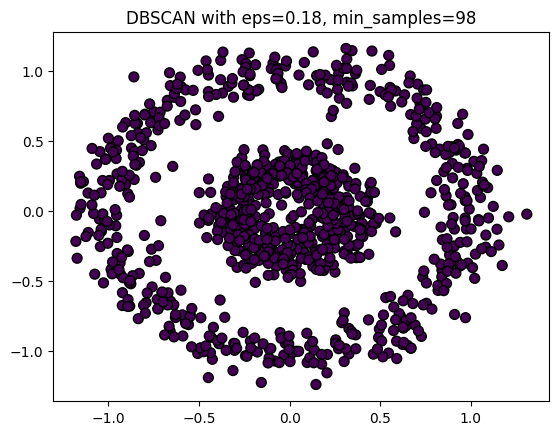

In [995]:
eps=0.18
min_samples=98
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X)
display_clusters(clusters,eps,min_samples)

Кластерные метки: [-1  0  1]
Количество выбросов: 1


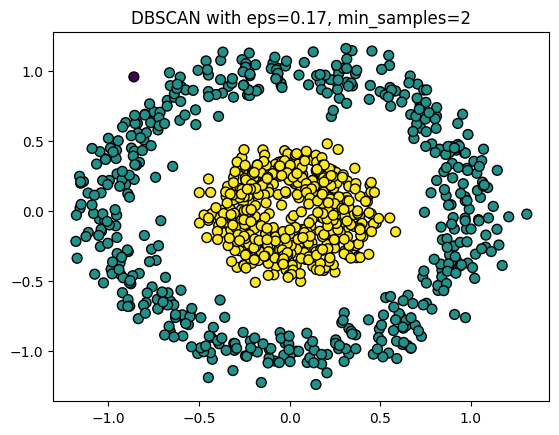

In [1001]:
eps=0.17
min_samples=2
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X)
display_clusters(clusters,eps,min_samples)

Кластерные метки: [-1  0  1]
Количество выбросов: 2


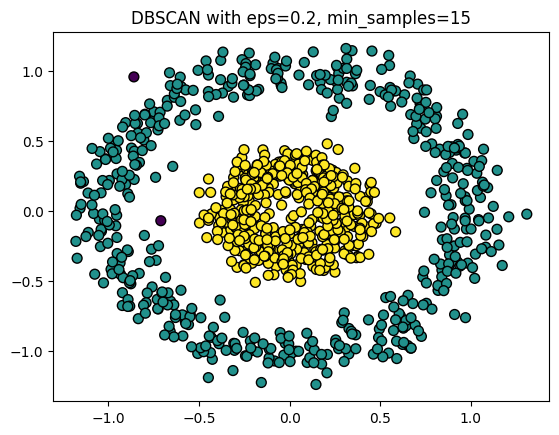

In [961]:
eps=0.2
min_samples=15
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X)
display_clusters(clusters,eps,min_samples)

______________________________

## Поиск оптимальных значений гиперпараметров DBSCAN

Построим график зависимосnи количества  выбросов от значения eps

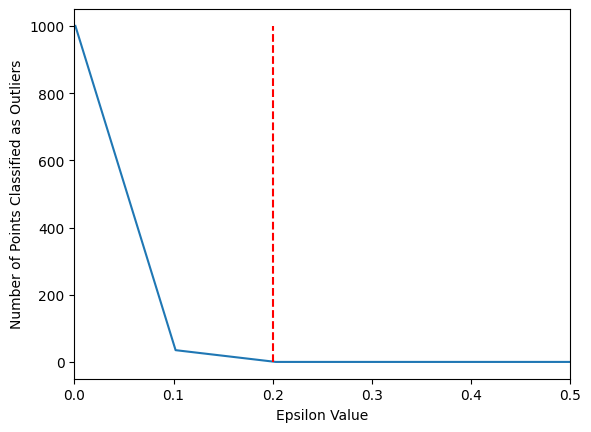

In [1008]:
number_of_outliers=[]
for eps in np.linspace(0.001,10,100):
    dbscan=DBSCAN(eps=eps)
    dbscan.fit(X)
    number_of_outliers.append(np.sum(dbscan.labels_==-1))
sns.lineplot(x= np.linspace(0.001,10,100), y=number_of_outliers) 
plt.ylabel('Number of Points Classified as Outliers')
plt.xlabel('Epsilon Value') 
plt.xlim(0,0.5) 
plt.vlines(x=0.2, ymin=0, ymax=1000, color='red', ls='--') 
            

К значению eps=0.2 пробуем подобрать min_samples

Кластерные метки: [0]
Количество выбросов: 0


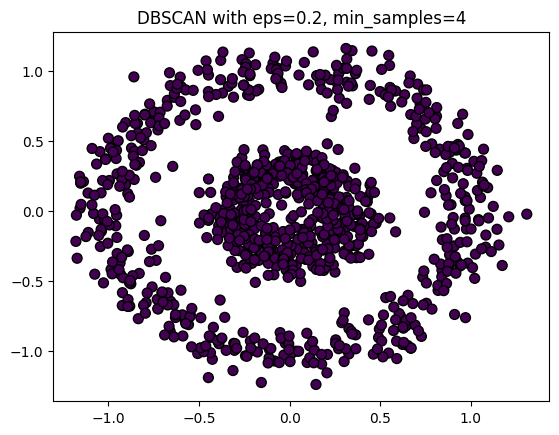

In [1011]:
eps=0.2
min_samples=2*X.shape[1]
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X)
display_clusters(clusters,eps,min_samples)


Построим график зависимости количества выбросов от значения min_samples

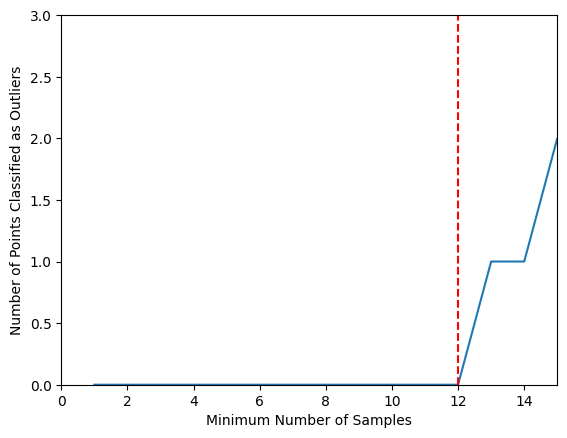

In [1018]:
number_of_outliers=[]
for n in np.arange(1,100):
    dbscan=DBSCAN(eps=0.2,min_samples=n)
    dbscan.fit(X)
    number_of_outliers.append(np.sum(dbscan.labels_==-1))
sns.lineplot(x= np.arange(1,100), y=number_of_outliers) 
plt.ylabel('Number of Points Classified as Outliers')
plt.xlabel('Minimum Number of Samples') 
plt.xlim(0,15)
plt.ylim(0,3)
plt.vlines(x=12, ymin=0, ymax=1000, color='red', ls='--') 

    

Кластерные метки: [0 1]
Количество выбросов: 0


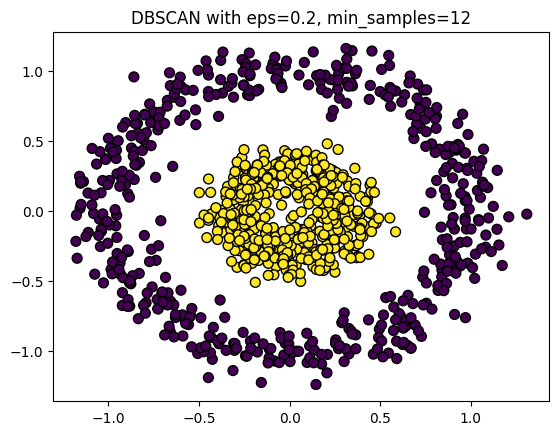

In [1020]:
eps=0.2
min_samples=12
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X)
display_clusters(clusters,eps,min_samples)

____________

## Сравнение с KMeans

Кластеры получились совсем не те, что хотелось. Данные теперь лежат в разных  полуплоскостях.

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


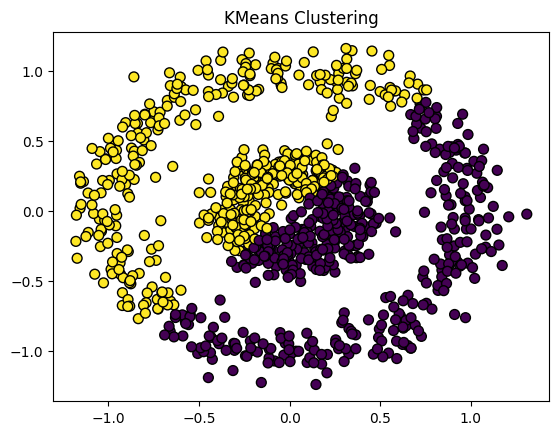

In [1037]:

kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="viridis", marker='o', edgecolor='black', s=50)
plt.title('KMeans Clustering')
plt.show()

   


## Работа с dataset iris

In [1057]:
from sklearn.datasets import load_iris

iris = load_iris()
df= pd.DataFrame(data= np.c_[iris['data']],
                     columns= iris['feature_names'])
X = iris.data



In [1058]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [1063]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

In [1065]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X.shape[1])
    dbscan.fit(scaled_X)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

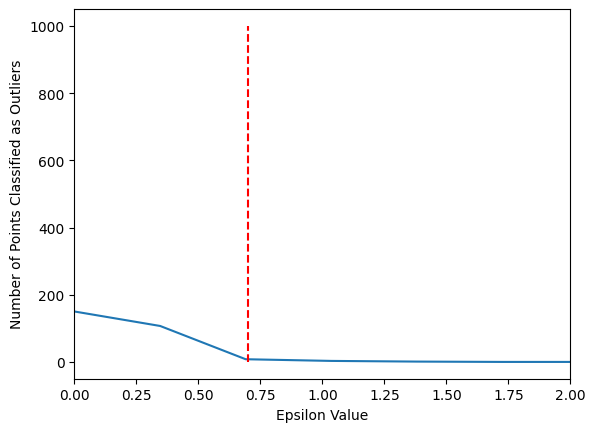

In [1117]:
number_of_outliers=[]
for eps in np.linspace(0.001,10,30):
    dbscan=DBSCAN(eps=eps)
    dbscan.fit(scaled_X)
    number_of_outliers.append(np.sum(dbscan.labels_==-1))
sns.lineplot(x= np.linspace(0.001,10,30), y=number_of_outliers) 
plt.ylabel('Number of Points Classified as Outliers')
plt.xlabel('Epsilon Value') 
plt.xlim(0,2)
plt.vlines(x=0.7, ymin=0, ymax=1000, color='red', ls='--') 

Кластерные метки: [-1  0  1]
Количество выбросов: 17


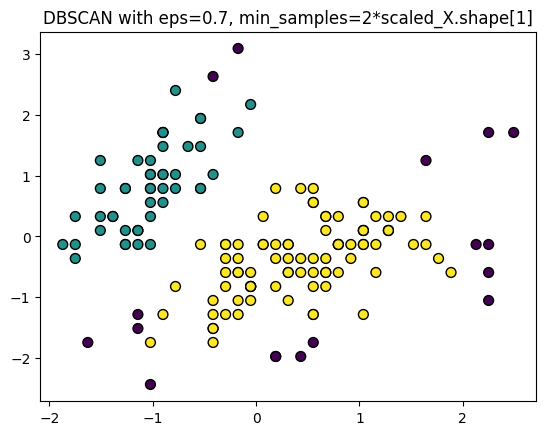

In [1152]:
dbscan = DBSCAN(eps=0.7, min_samples=2*scaled_X.shape[1])
clusters = dbscan.fit_predict(scaled_X)
plt.scatter(scaled_X[:, 0], scaled_X[:, 1], c=clusters, cmap="viridis", marker='o', edgecolor='black', s=50)
plt.title('DBSCAN with eps=0.7, min_samples=2*scaled_X.shape[1]')
print(f'Кластерные метки: {np.unique(dbscan.labels_)}')
print(f'Количество выбросов: {np.sum(dbscan.labels_==-1)}') 
plt.show()
   

Text(0.5, 0, 'Minimum Number of Samples')

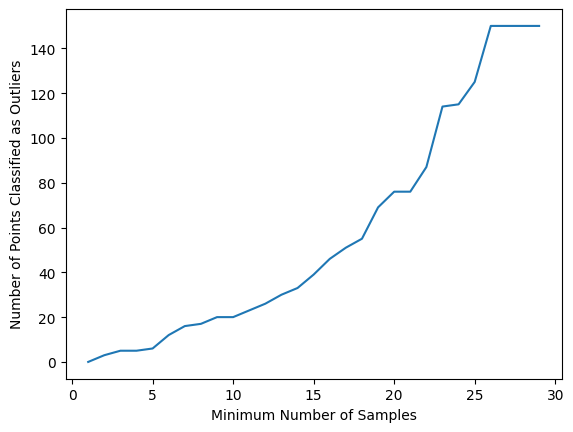

In [1153]:
number_of_outliers=[]
for n in np.arange(1,30):
    dbscan=DBSCAN(eps=0.7,min_samples=n)
    dbscan.fit(scaled_X)
    number_of_outliers.append(np.sum(dbscan.labels_==-1))
sns.lineplot(x= np.arange(1,30), y=number_of_outliers) 
plt.ylabel('Number of Points Classified as Outliers')
plt.xlabel('Minimum Number of Samples') 


Анализируя график приходим к выводу, что лучшие значения min_sample принимает в диапозоне от 1 до 5, возьмем значение 2, чтобы было меньше выбросов 

Кластерные метки: [-1  0  1  2]
Количество выбросов: 3


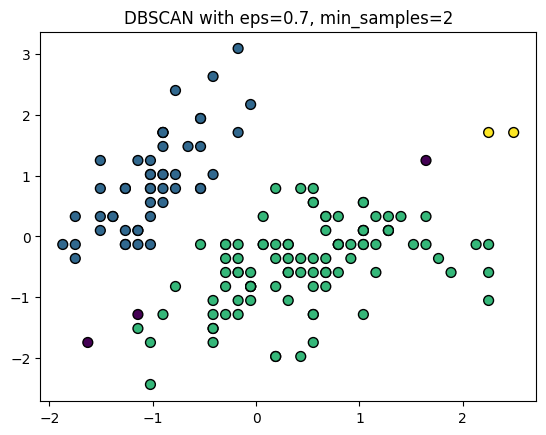

In [1154]:
dbscan = DBSCAN(eps=0.7, min_samples=2)
clusters = dbscan.fit_predict(scaled_X)
plt.scatter(scaled_X[:, 0], scaled_X[:, 1], c=clusters, cmap="viridis", marker='o', edgecolor='black', s=50)
plt.title('DBSCAN with eps=0.7, min_samples=2')
print(f'Кластерные метки: {np.unique(dbscan.labels_)}')
print(f'Количество выбросов: {np.sum(dbscan.labels_==-1)}') 
plt.show()

In [1172]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>

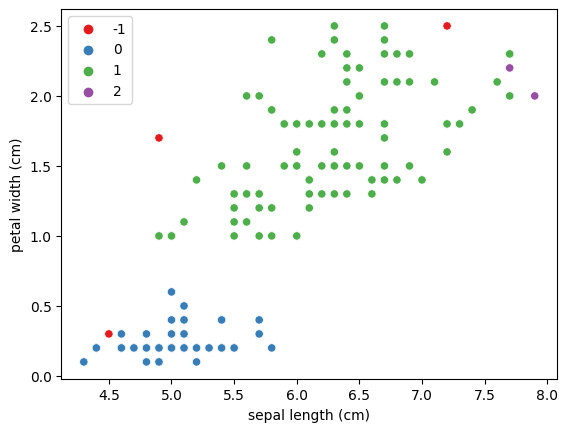

In [1170]:
sns.scatterplot(data=df,x='sepal length (cm)',y='petal width (cm)',hue=dbscan.labels_,palette='Set1')

<Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>

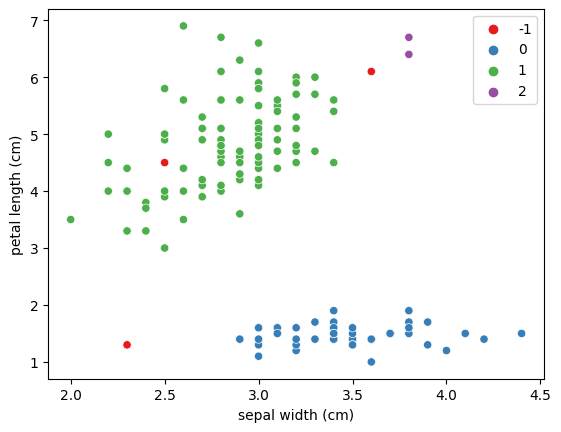

In [1175]:
sns.scatterplot(data=df,x='sepal width (cm)',y='petal length (cm)',hue=dbscan.labels_,palette='Set1')

In [1163]:
df['Labels'] = dbscan.labels_
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Labels
0,5.1,3.5,1.4,0.2,0
41,4.5,2.3,1.3,0.3,-1
36,5.5,3.5,1.3,0.2,0
109,7.2,3.6,6.1,2.5,-1
148,6.2,3.4,5.4,2.3,1
90,5.5,2.6,4.4,1.2,1
66,5.6,3.0,4.5,1.5,1
79,5.7,2.6,3.5,1.0,1
44,5.1,3.8,1.9,0.4,0
126,6.2,2.8,4.8,1.8,1


In [1176]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(df)
scaled_means = pd.DataFrame(data,df.index,df.columns)
print(scaled_means)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)   
0             0.222222          0.625000           0.067797          0.041667  \
1             0.166667          0.416667           0.067797          0.041667   
2             0.111111          0.500000           0.050847          0.041667   
3             0.083333          0.458333           0.084746          0.041667   
4             0.194444          0.666667           0.067797          0.041667   
..                 ...               ...                ...               ...   
145           0.666667          0.416667           0.711864          0.916667   
146           0.555556          0.208333           0.677966          0.750000   
147           0.611111          0.416667           0.711864          0.791667   
148           0.527778          0.583333           0.745763          0.916667   
149           0.444444          0.416667           0.694915          0.708333   

       Labels  
0    0.3333

<Axes: >

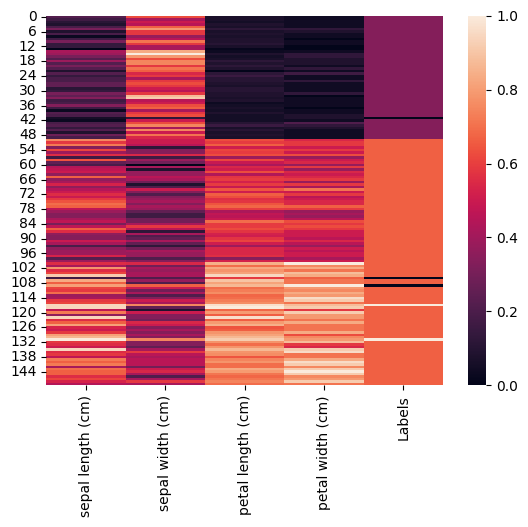

In [1165]:
sns.heatmap(scaled_means)

<Axes: >

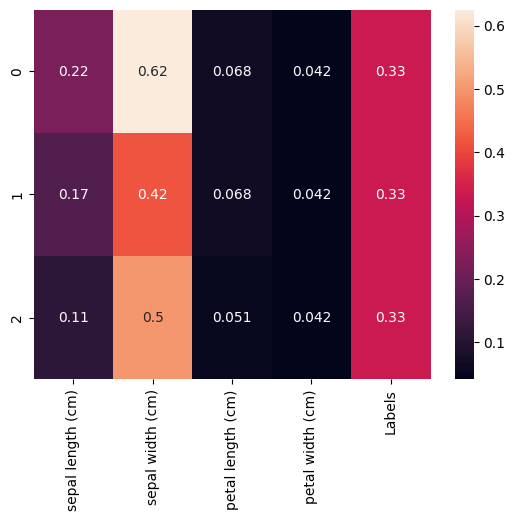

In [1169]:
sns.heatmap(scaled_means.loc[[0,1,2]],annot=True)